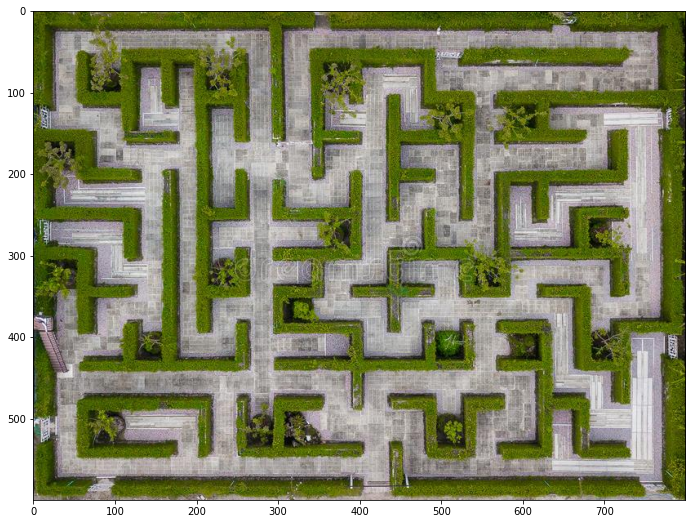

In [173]:
# READ IMAGE

import cv2 
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)
from algorithms import *
from utils.plotting import imshow

DEBUG = False

image1 = cv2.imread('images/maze_2.jpg') 
source_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb)

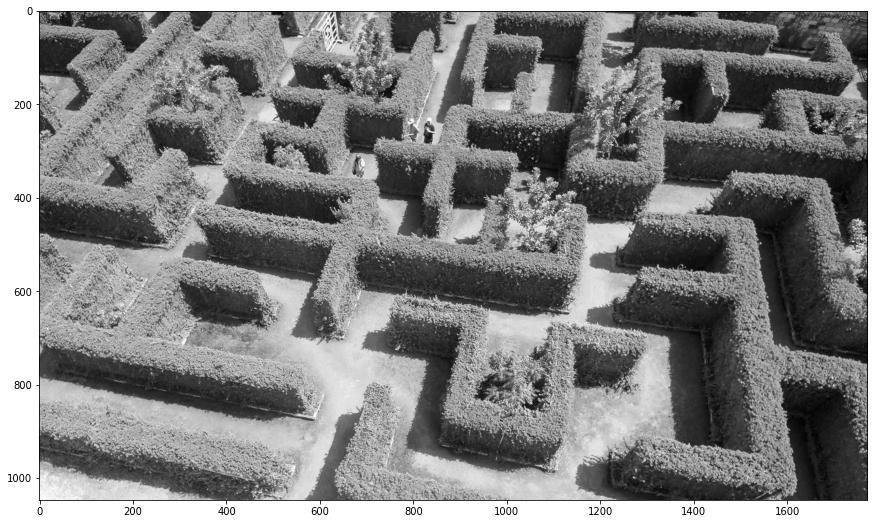

In [44]:
plt.imshow(source_gray, cmap='gray')

# Test 1

In [177]:
# THRESHOLDING

def threshold(image, blur_k, thresh_k=91):
    h, w = image.shape[:2]
    if not blur_k:
        blur_k = int(min(h, w)//22)
    if blur_k%2 == 0:
        blur_k -= 1
    blur_img = cv2.GaussianBlur(image, (blur_k,blur_k), 1)
    thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, thresh_k, 10)
    return thresh2

# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

def morphological(image, erosion_k, dilation_k):
    h, w = image.shape[:2]
    
    if not erosion_k:
        erosion_k = int(min(h, w)//30)
    if erosion_k%2 == 0:
        erosion_k-=1
    
    if not dilation_k:
        dilation_k = int(min(h, w)//20)
    if dilation_k%2 == 0:
        dilation_k-=1

    img_erosion = cv2.erode(image, get_kernel(erosion_k), iterations=1)
    img_dilation = cv2.dilate(img_erosion, get_kernel(dilation_k), iterations=1)

    return img_dilation

# RESIZE IMAGE 

def resize_image(image, step):
    h, w = image.shape[:2]
    T = int(255/1.2)
    new_image = np.full(image.shape, 0)
    for i in range(0, w, step):
        for j in range(0, h, step):
            area = image[j:j+step, i:i+step]
            if np.mean(area) > T:
                new_image[j:j+step, i:i+step] += 255

    resized_img = cv2.resize(new_image, (new_image.shape[1]//step, new_image.shape[0]//step), interpolation = cv2.INTER_LINEAR_EXACT)
    resized_img[resized_img > 0] = 255
    return resized_img

    
def project_solution(h_source, w_source, h_resized, w_resized, solution):
    new_solution = []
    for x, y in solution:
        new_x = int(w_source*x/w_resized)
        new_y = int(h_source*y/h_resized)
        new_solution.append([new_x, new_y])
    return new_solution

def draw_solution(source_image, new_solution):
    rad = min(source_image.shape[0], source_image.shape[1]) //100
    if rad < 1:
        rad = 1
    for x, y in new_solution:
        cv2.circle(source_image, (y, x), rad, (255, 0, 0), -1)
    return source_image


In [ ]:
thresh_img = threshold(source_gray)
morph_img = morphological(thresh_img)
resized_img = resize_image(morph_img, step=16)
plt.imshow(resized_img, cmap='gray')
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
# SOLVE MAZE
start = 2, 34
finish = 10, 24

bfs = BFS(image_maze_gray, start=start, finish=finish)
solution = bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
print(new_solution)
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

In [178]:
thresh_img = threshold(source_gray)
morph_img = morphological(thresh_img)
resized_img = resize_image(morph_img, step=16)

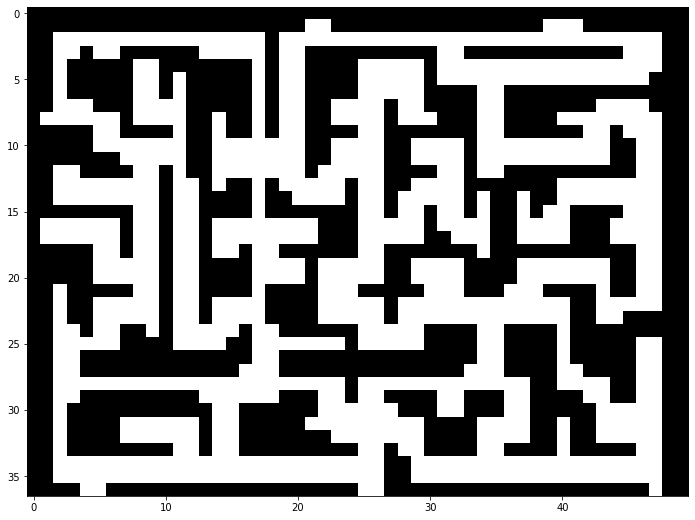

In [179]:
plt.imshow(resized_img, cmap='gray')

In [ ]:
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)

In [ ]:
# SOLVE MAZE
start = 2, 34
finish = 10, 24

bfs = BFS(image_maze_gray, start=start, finish=finish)
solution = bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))

In [ ]:
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
print(new_solution)

In [ ]:
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

# Test 2

25


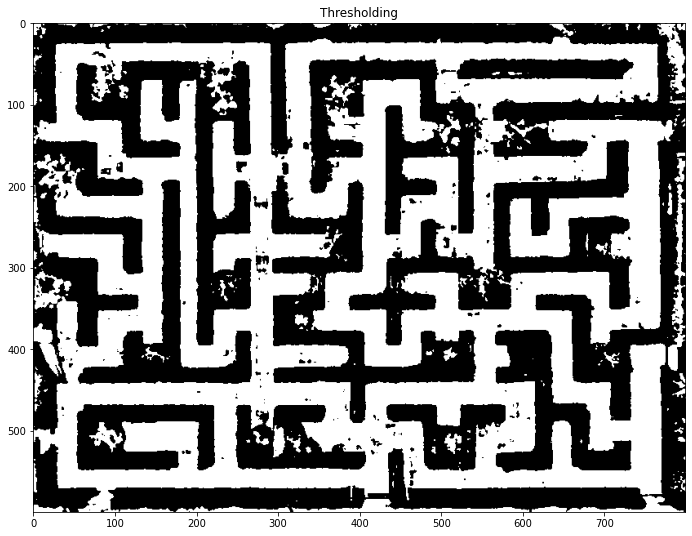

In [171]:
# PRINT INTERMEDIATE RESULTS

# THRESHOLDING

def threshold(image):
    h, w = image.shape[:2]
    kernel = int(max(h, w)//30)
    if kernel%2 == 0:
        kernel -= 1
    print(kernel)
    kernel = 121
    blur_img = cv2.GaussianBlur(image, (kernel,kernel), 1)
    thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 61, 0)
    return thresh2

thresh_img = threshold(source_gray)


plt.title('Thresholding')
plt.imshow(thresh_img, cmap='gray')

19 29


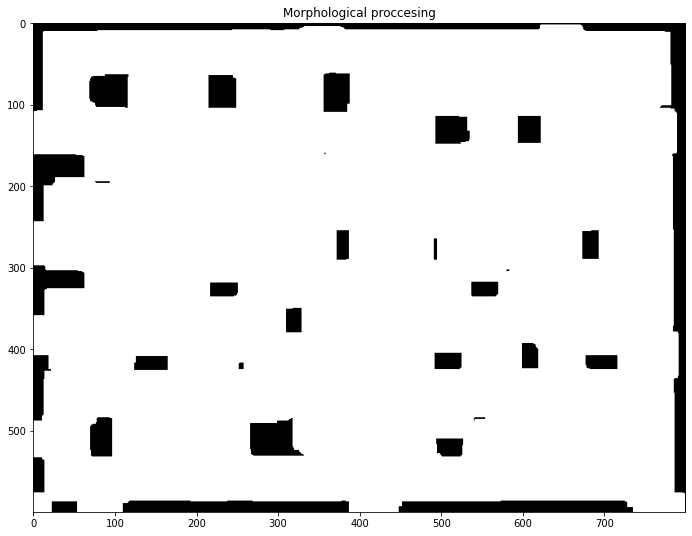

In [172]:
# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

def morphological(image):
    h, w = image.shape[:2]
    
    erosion_k = int(min(h, w)//30)
    if erosion_k%2 == 0:
        erosion_k-=1
    
    dilation_k = int(min(h, w)//20)
    if dilation_k%2 == 0:
        dilation_k-=1

    print(erosion_k, dilation_k)

    #opening
    image = cv2.erode(image, get_kernel(13), iterations=1)
    image = cv2.dilate(image, get_kernel(45), iterations=1)
    

    #closing
    #image = cv2.dilate(image, get_kernel(6), iterations=1)
    #image = cv2.erode(image, get_kernel(13), iterations=1)

    return image

morph_img = morphological(thresh_img)

plt.title('Morphological proccesing')
plt.imshow(morph_img, cmap='gray')

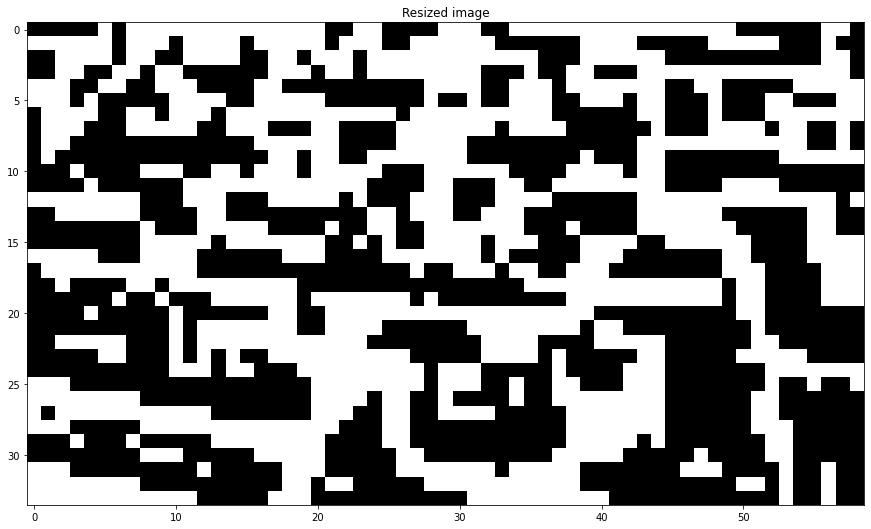

In [108]:
# RESIZE IMAGE 

def resize_image(image, step):
    h, w = image.shape[:2]
    T = int(step*step*255/1.2)
    new_image = np.full(image.shape, 0)
    for i in range(0, w, step):
        for j in range(0, h, step):
            area = image[j:j+step, i:i+step]
            if np.sum(area) > T:
                new_image[j:j+step, i:i+step] += 255

    resized_img = cv2.resize(new_image, (new_image.shape[1]//step, new_image.shape[0]//step), interpolation = cv2.INTER_LINEAR_EXACT)
    resized_img[resized_img > 0] = 255
    return resized_img

resized_img = resize_image(morph_img, step=30)

plt.title('Resized image')
plt.imshow(resized_img, cmap='gray')

In [ ]:
image_maze_gray = np.float32(resized_img)
temp = cv2.dilate(image_maze_gray, get_kernel(2), iterations=1, borderType=cv2.BORDER_TRANSPARENT)
plt.imshow(temp, cmap='gray')

In [54]:
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)

In [ ]:
image_maze_rgb[10, 28] = [255, 0, 0]
image_maze_rgb[22, 24] = [0, 255, 0]
plt.imshow(image_maze_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!


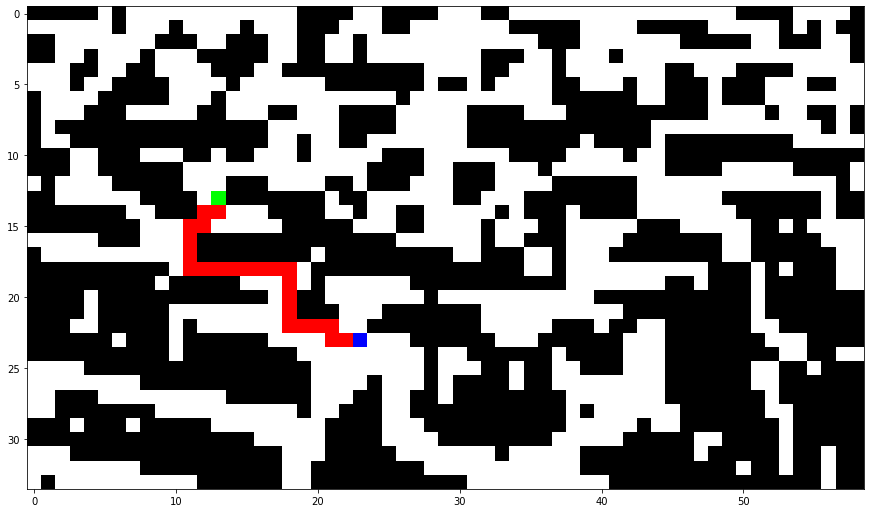

In [109]:
# SOLVE MAZE
start = 13, 13#10, 28 
finish = 23, 23#22, 24

bfs = BFS(image_maze_gray, start=start, finish=finish)
solution = bfs.solve(debug=False)
imshow(bfs.draw(image_maze_rgb, thickness=1))

In [110]:
def project_solution(h_source, w_source, h_resized, w_resized, solution):
    new_solution = []
    for x, y in solution:
        new_x = int(w_source*x/w_resized)
        new_y = int(h_source*y/h_resized)
        new_solution.append([new_x, new_y])
    return new_solution

def draw_solution(source_image, new_solution):
    rad = min(source_image.shape[0], source_image.shape[1]) //100
    if rad < 1:
        rad = 1
    for x, y in new_solution:
        cv2.circle(source_image, (y, x), rad, (255, 0, 0), -1)
    return source_image

h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
print(new_solution)

[[390, 400], [420, 400], [420, 369], [450, 369], [450, 338], [480, 338], [510, 338], [540, 338], [540, 369], [540, 400], [540, 431], [540, 461], [540, 492], [540, 523], [540, 554], [570, 554], [600, 554], [630, 554], [660, 554], [660, 585], [660, 615], [660, 646], [690, 646], [690, 677], [690, 708]]


In [22]:
print(h_source, w_source, h_resized, w_resized)

1047 1772 34 59


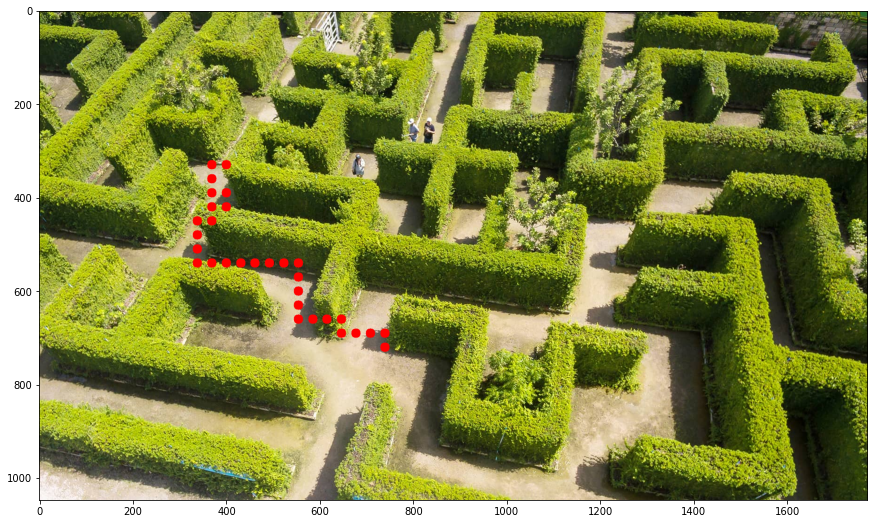

In [111]:
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

# Test Algorithms

In [112]:
# THRESHOLDING

def threshold(image):
    h, w = image.shape[:2]
    kernel = int(min(h, w)//22)
    if kernel%2 == 0:
        kernel -= 1
    blur_img = cv2.GaussianBlur(image, (kernel,kernel), 1)
    thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 91, 10)
    return thresh2

# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

def morphological(image):
    h, w = image.shape[:2]
    
    erosion_k = int(min(h, w)//30)
    if erosion_k%2 == 0:
        erosion_k-=1
    
    dilation_k = int(min(h, w)//20)
    if dilation_k%2 == 0:
        dilation_k-=1

    img_erosion = cv2.erode(image, get_kernel(erosion_k), iterations=1)
    img_dilation = cv2.dilate(img_erosion, get_kernel(dilation_k), iterations=1)

    return img_dilation

# RESIZE IMAGE 

def resize_image(image, step):
    h, w = image.shape[:2]
    T = int(step*step*255/1.2)
    new_image = np.full(image.shape, 0)
    for i in range(0, w, step):
        for j in range(0, h, step):
            area = image[j:j+step, i:i+step]
            if np.sum(area) > T:
                new_image[j:j+step, i:i+step] += 255

    resized_img = cv2.resize(new_image, (new_image.shape[1]//step, new_image.shape[0]//step), interpolation = cv2.INTER_LINEAR_EXACT)
    resized_img[resized_img > 0] = 255
    return resized_img

    
def project_solution(h_source, w_source, h_resized, w_resized, solution):
    new_solution = []
    for x, y in solution:
        new_x = int(w_source*x/w_resized)
        new_y = int(h_source*y/h_resized)
        new_solution.append([new_x, new_y])
    return new_solution

def draw_solution(source_image, new_solution):
    rad = min(source_image.shape[0], source_image.shape[1]) //100
    if rad < 1:
        rad = 1
    for x, y in new_solution:
        cv2.circle(source_image, (y, x), rad, (255, 0, 0), -1)
    return source_image


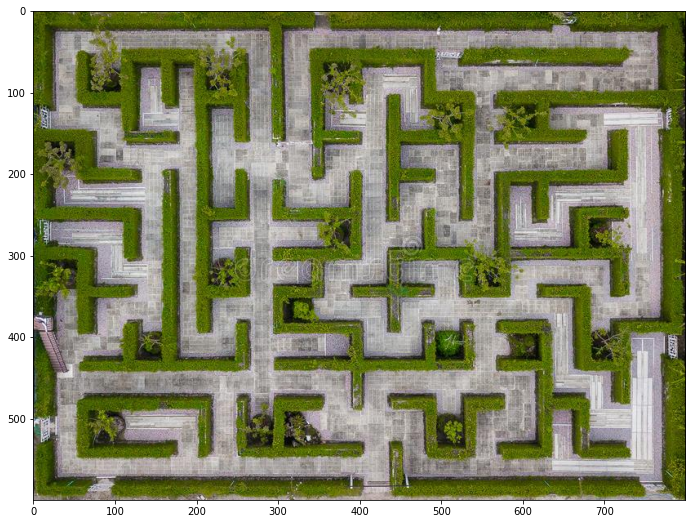

In [170]:
DEBUG = False

image1 = cv2.imread('images/maze_2.jpg') 
source_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb)

In [ ]:
thresh_img = threshold(source_gray)
morph_img = morphological(thresh_img)
resized_img = resize_image(morph_img, step=16)
plt.imshow(resized_img, cmap='gray')
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
# SOLVE MAZE
start = 2, 34
finish = 10, 24

bfs = BFS(image_maze_gray, start=start, finish=finish)
solution = bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
print(new_solution)
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

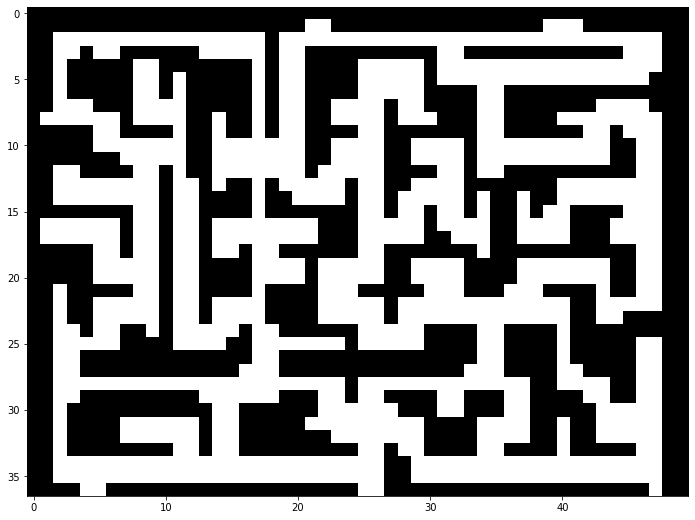

In [163]:
thresh_img = threshold(source_gray)
morph_img = morphological(thresh_img)
resized_img = resize_image(morph_img, step=16)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!
10.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


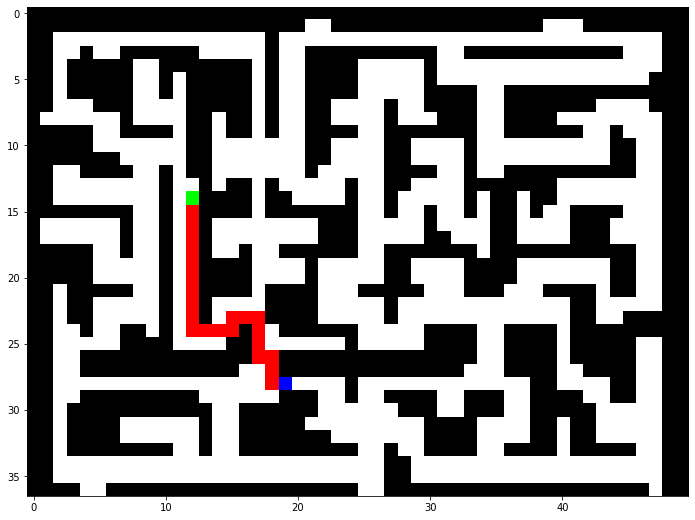

In [149]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

bfs = BFS(image_maze_gray, start=start, finish=finish)
%timeit -r1 -n1 solution = bfs.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!
10.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


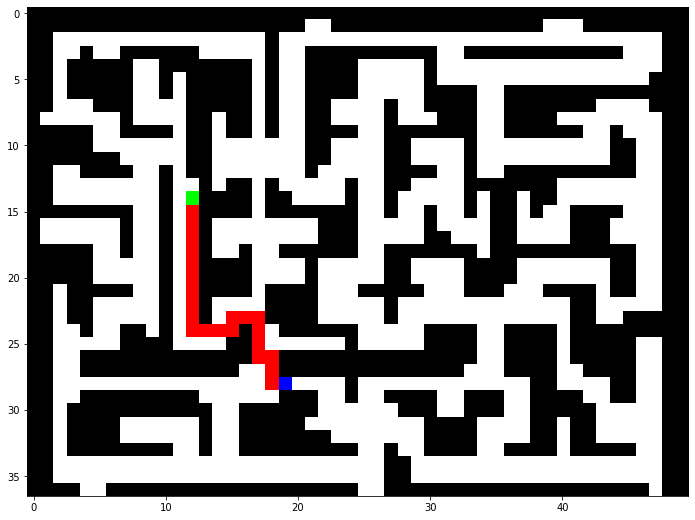

In [150]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

astar = A_Star(image_maze_gray, start=start, finish=finish, heuristic='euclidean')
%timeit -r1 -n1 solution = astar.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(astar.draw(image_maze_rgb, thickness=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!
1min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


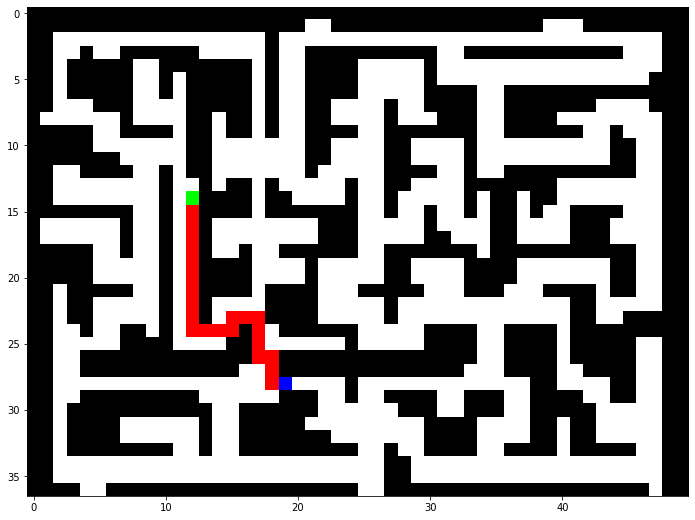

In [151]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

astar = A_Star(image_maze_gray, start=start, finish=finish, heuristic='cosine')
%timeit -r1 -n1 solution = astar.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(astar.draw(image_maze_rgb, thickness=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!
10.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


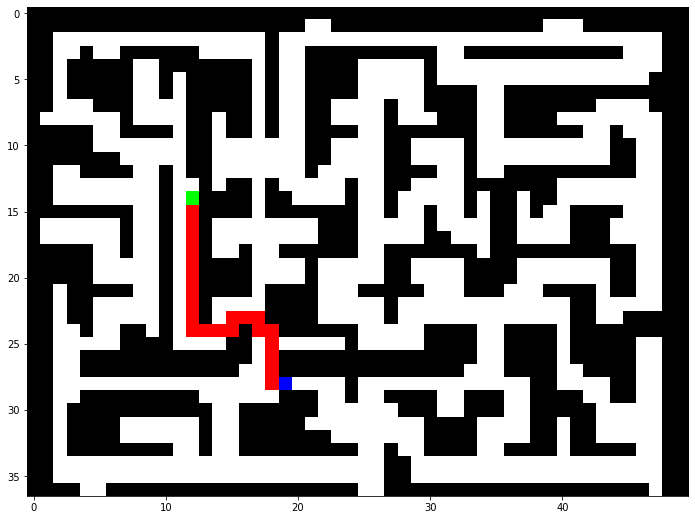

In [152]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

astar = A_Star(image_maze_gray, start=start, finish=finish, heuristic='manhattan')
%timeit -r1 -n1 solution = astar.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(astar.draw(image_maze_rgb, thickness=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!
818 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


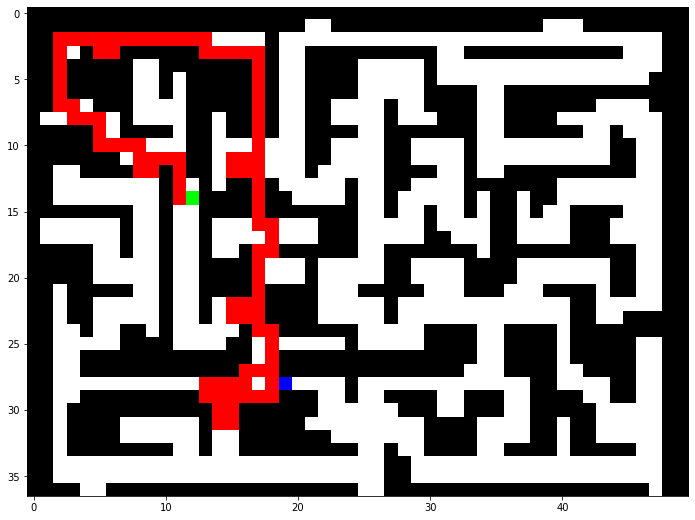

Solution has been found!


In [164]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

dfs = DFS(image_maze_gray, start=start, finish=finish)
%timeit -r1 -n1 solution = dfs.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(dfs.draw(image_maze_rgb, thickness=1))
solution = dfs.solve(debug=DEBUG)

In [ ]:
# SOLVE MAZE
start = 14, 12
finish = 28, 19

tremaux = Tremaux(image_maze_gray, start=start, finish=finish)
%timeit -r1 -n1 solution = tremaux.solve(debug=DEBUG)
#bfs.solve(debug=DEBUG)
imshow(tremaux.draw(image_maze_rgb, thickness=1))

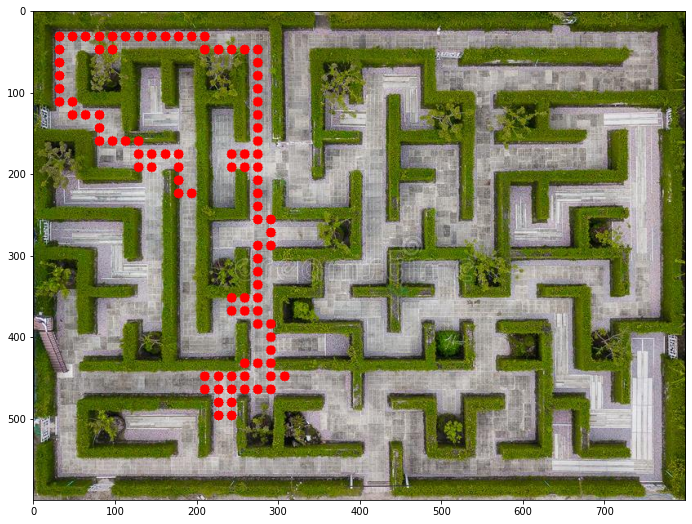

In [165]:
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)